<a href="https://colab.research.google.com/github/AlePol27/2022_ML_Earth_Env_Sci/blob/main/Lab_Notebooks/S3_2_Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 2: Training and Fine-Tuning a Decision Tree for the Moons Dataset

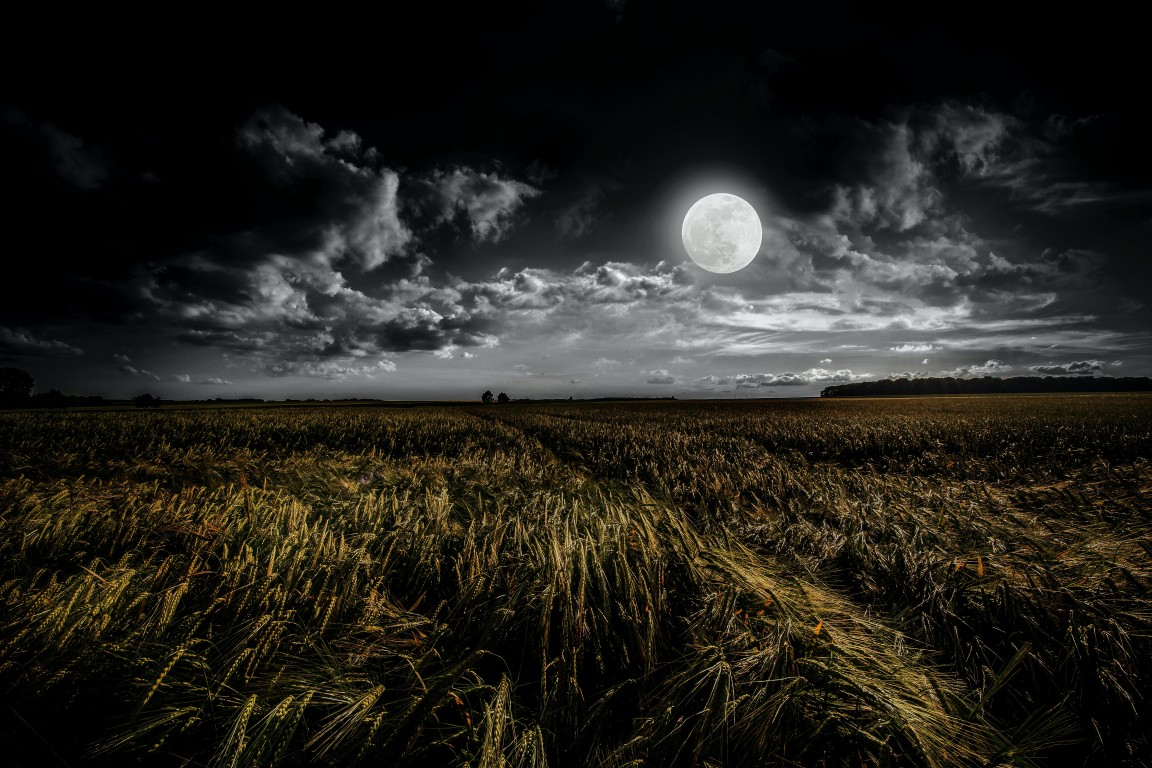

Can we grow a tree to predict the moon? 🌳 🌛

The goal of this exercise is to train and adjust the hyperparameters of a decision tree on a synthetic "moons" dataset. The dataset contains two interleaving half circles that we seek to separate via classification.

First, let's generate a moons dataset using [`make_moons`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html).

In [1]:
from sklearn.datasets import make_moons # Import function to make moons

In [2]:
# Make 10,000 samples with Gaussian noise that has a standard deviation of 0.4
X, y = make_moons(n_samples=10000, noise=0.4)

**Q1) Split the moons dataset into a training and a test set**

Hint 1: You may use the [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function of `scikit-learn`.

Hint 2: We recommend keeping 20% of the dataset for testing.

In [9]:
# Split the dataset into a training set and a test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2)

**Q2) Visualize the data, indicating which points belong to each half circle of the moon, and which points belong to the training and test sets**

Hint 1: In the moons dataset, `X` contains the 2D spatial coordinates of each sample, while `y` indicates which half circle of the moon the sample belongs to.

Hint 2: You may randomly subsample your data for visualization purposes. Alternatively, you can adjust the size and transparency of a [Matplotlib scatter plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) by varying the parameters `s` and `alpha`.

<a name="Q2"></a>

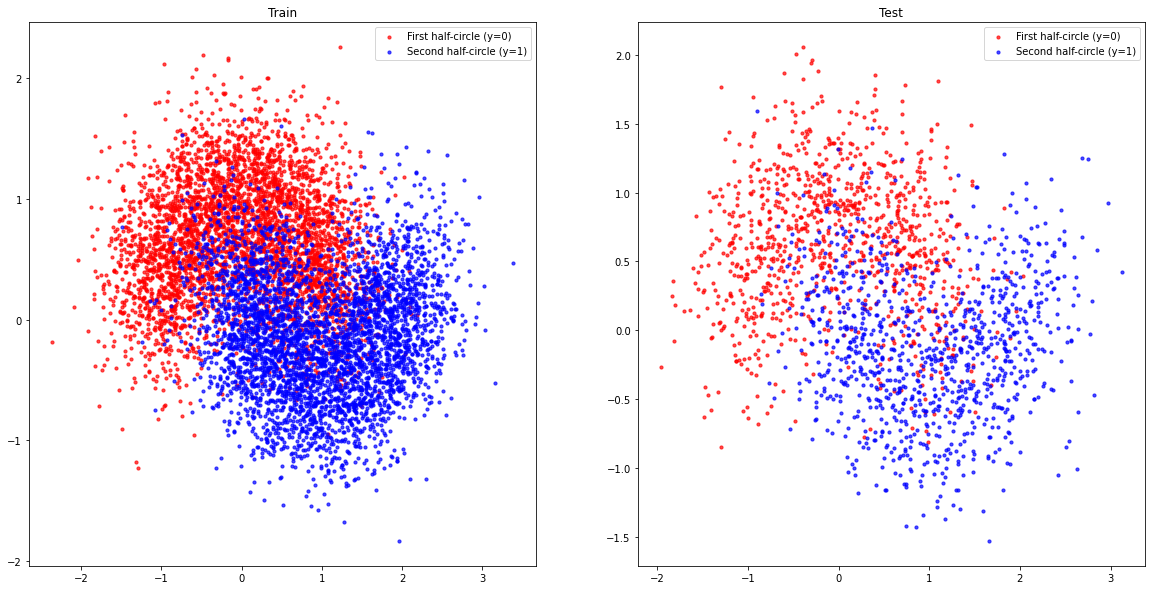

In [61]:
# Scatter the moon data and don't forget to add a legend to your figure
import matplotlib.pyplot as plt
fig, (axes1, axes2) = plt.subplots(1, 2, figsize = (20, 10))

axes1.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], c = 'r', s = 10, alpha = 0.7, label = 'First half-circle (y=0)')
axes1.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], c = 'b', s = 10, alpha = 0.7, label = 'Second half-circle (y=1)')
axes1.set_title('Train')
axes1.legend(loc = 'upper right')

axes2.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], c = 'r', s = 10, alpha = 0.7, label = 'First half-circle (y=0)')
axes2.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], c = 'b', s = 10, alpha = 0.7, label = 'Second half-circle (y=1)')
axes2.set_title('Test')
axes2.legend(loc = 'upper right')

Do your data & training/test splits look reasonable?

**Q3) Conduct a hyperparameter search to find the two hyperparameters that lead to the best-performing decision tree**

Hint 1: You can conduct an exhaustive hyperparameter search over specified parameter values using the `GridSearchCV` class documented [at this link](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). We recommend using cross-validation by setting the parameter `cv`.

Hint 2: If you choose to train a [`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) object, we recommmend conducting the search over the `max_leaf_nodes` and `min_samples_split` hyperparameters. Consult the [`DecisionTreeClassifier` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) to decide which range to search over.

<a name="Q3"></a>

In [63]:
# Import the necessary classes and functions
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
Tree = DecisionTreeClassifier()

In [65]:
# Conduct the grid search to find good hyperparameter values 
# for your decision tree
param = {'max_leaf_nodes': [10, 20, 30, 40, 50], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
gscv = GridSearchCV(Tree, param, cv = 5)
gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_leaf_nodes': [10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [66]:
# Print the best values you found for the hyperparameters
# using the `best_estimator_` attribute of your grid search object
gscv.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=20, min_samples_leaf=6)

**Q4) Using the best hyperparameter values you found, train a decision tree over the entire training set and calculate its accuracy over both the training and test sets**

Hint 1: [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) has a method `predict` that automatically selects the best model found during the search.

Hint 2: Using the [accuracy classification score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html), you should find an accuracy of $\approx$85% on the test set.

In [67]:
# Make predictions on the training and test sets with your best model
X_train_pred = gscv.predict(X_train)
X_test_pred = gscv.predict(X_test)

In [68]:
# Calculate the accuracy of the best model over the training and test sets
from sklearn.metrics import accuracy_score
accuracy_score(X_train_pred, y_train)*100, accuracy_score(X_test_pred, y_test)*100

(87.45, 86.1)

**Q5) Visualize the errors made by your best model**

Hint: You may recycle the visualization scripts you developed in [Question 2](#Q2)

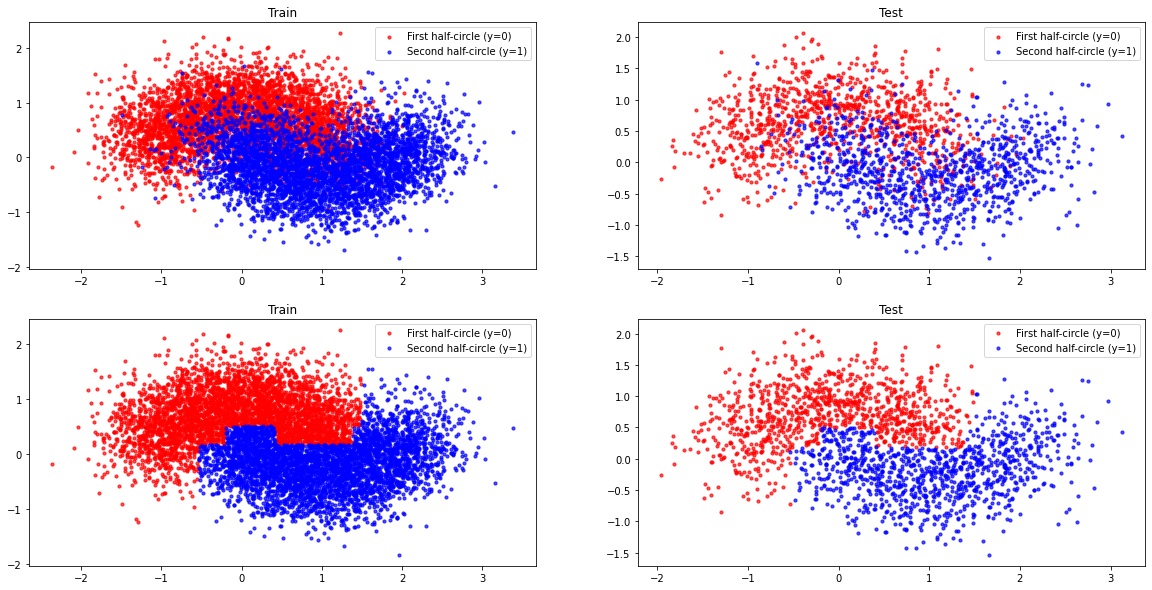

In [69]:
# Scatter points for which your best model made erroneous predictions
# and compare them to points for which your best models made correct predictions
fig, ((axes1, axes2), (axes3, axes4)) = plt.subplots(2, 2, figsize = (20, 10))

axes1.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], c = 'r', s = 10, alpha = 0.7, label = 'First half-circle (y=0)')
axes1.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], c = 'b', s = 10, alpha = 0.7, label = 'Second half-circle (y=1)')
axes1.set_title('Train')
axes1.legend(loc = 'upper right')

axes2.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], c = 'r', s = 10, alpha = 0.7, label = 'First half-circle (y=0)')
axes2.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], c = 'b', s = 10, alpha = 0.7, label = 'Second half-circle (y=1)')
axes2.set_title('Test')
axes2.legend(loc = 'upper right')

axes3.scatter(X_train[X_train_pred == 0, 0], X_train[X_train_pred == 0, 1], c = 'r', s = 10, alpha = 0.7, label = 'First half-circle (y=0)')
axes3.scatter(X_train[X_train_pred == 1, 0], X_train[X_train_pred == 1, 1], c = 'b', s = 10, alpha = 0.7, label = 'Second half-circle (y=1)')
axes3.set_title('Train')
axes3.legend(loc = 'upper right')

axes4.scatter(X_test[X_test_pred == 0, 0], X_test[X_test_pred == 0, 1], c = 'r', s = 10, alpha = 0.7, label = 'First half-circle (y=0)')
axes4.scatter(X_test[X_test_pred == 1, 0], X_test[X_test_pred == 1, 1], c = 'b', s = 10, alpha = 0.7, label = 'Second half-circle (y=1)')
axes4.set_title('Test')
axes4.legend(loc = 'upper right')

Can you think of ways to improve your best model?

# Bonus Exercise 2: Upgrading the Decision Tree to a Random Forest

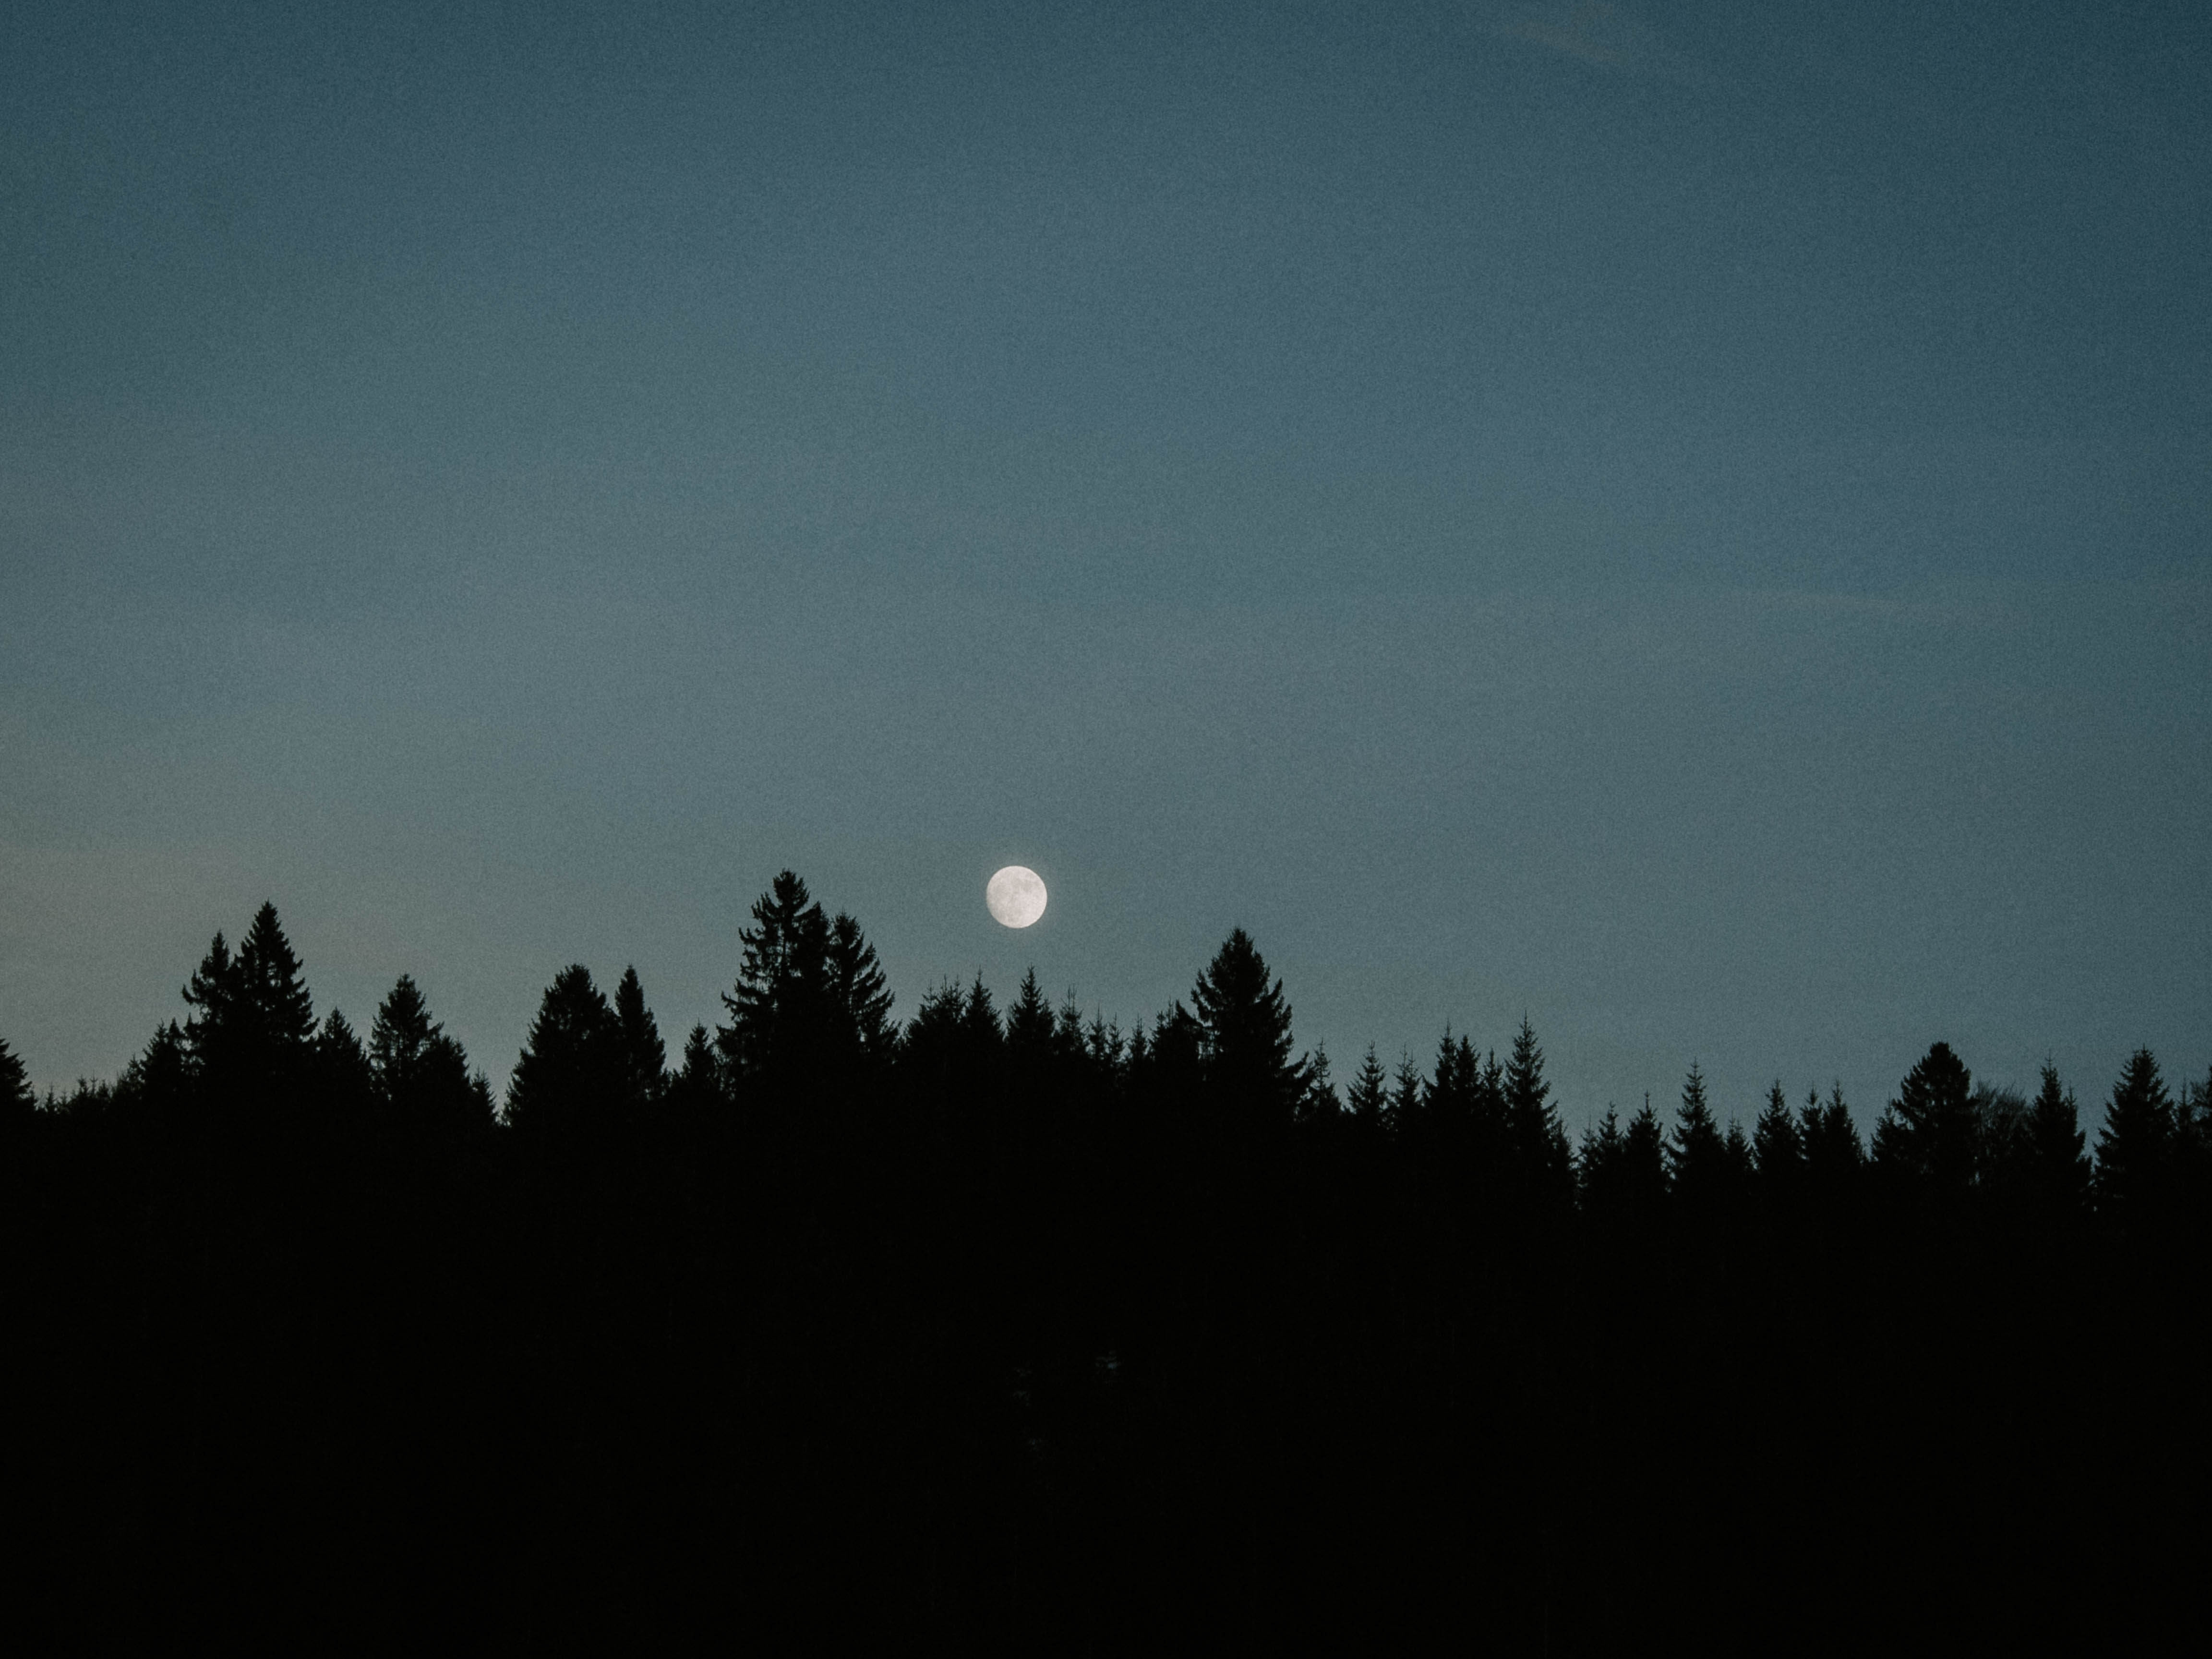

Is a full forest enough to predict the moon? 🌲

Building on the previous exercise, we would like to upgrade the decision tree to a random forest to make more accurate predictions on the `moons` dataset.

**Q1) Generate 1,000 subsets of the training set, each containing 100 instances selected randomly**

Hint: You may use `scikit-learn`'s random permutation cross-validator [ShuffleSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html) with the appropriate value of the  `n_splits` parameter.

In [ ]:
# Import and build the random permutation cross-validator

In [ ]:
# Generate 1,000 subsets of the training sets with 
# 100 randomly-selected instances

**Q2) Train one [`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) on each subset, using the best hyperparameter values found [above](#Q3)**

In [ ]:
# Train one decision tree per subset

**Q3) Evaluate each decision tree on the test set and visualize their accuracy**

Hint 1: You can quickly make histograms by using `Matplotlib.pyplot`'s [`hist`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) function

Hint 2: The mean accuracy of your decision trees should be approximately 80% because the decision trees are fitted on smaller sets. 

In [ ]:
# Train one decision tree on each subset

In [ ]:
# Calculate the mean accuracy

In [ ]:
# Visualize the distribution of accuracies

Now comes the magic ❇ 🌲 ❇ 

**Q4) Generate the predictions of the 1,000 decision trees over the test set, and only keep the most frequent prediction. This gives you *majority-vote predictions* over the test set**

Hint: You may use `Scipy`'s [`mode`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mode.html) function to calculate the most frequent prediction.

In [ ]:
# Generate the predictions of all trained decision trees over the test set

In [ ]:
# For each instance of the test set, calculate the majority-vote prediction

Congratulations!! 😃 You have created a random forest classifier 🌲 🌳 🌲

**Q5) Calculate the accuracy of your random forest classifier and visualize its performance**

Hint: Your accuracy should be approximately 1% higher than your best decision tree. 

In [ ]:
# Calculate the accuracy of your random forest classifier

In [ ]:
# Visualize its errors: Which points did the
# random forest classify correctly 
# when the decision tree was making an error?